In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, cohen_kappa_score, f1_score, classification_report

# Imports

In [46]:
import os
import ast
import json
import torch
from sklearn.svm import SVC
torch.manual_seed(0)
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import seaborn as sns
sns.set_theme()
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data_path = "../data/annotated_data"

# Load Data

In [47]:
files = [f for f in os.listdir(data_path) if f.endswith('jsonl')]
rows = []

In [48]:
for f in files:
    with open(f'{data_path}/{f}', 'r') as json_file:
        json_list = list(json_file)
    for json_str in json_list:
        result = json.loads(json_str)
        label = result["label"]
        text = result["text"]
        new_spans = []
        if result["spans"] and len(result["spans"]) != 0:
            try:
                new_spans = [s["text"] for s in result["spans"]]
            except:
                x = ast.literal_eval(result["spans"])
                new_spans = [s["text"] for s in x]
        new_row = {
            "text":text,
            "label":label,
            "spans":new_spans
        }
        rows.append(new_row)
    print(f"Loaded: {f}")
df = pd.DataFrame(rows)
df

Loaded: 3d_printed_clothes_sentences.jsonl
Loaded: cement_production_sentences.jsonl
Loaded: organic_food_sentences.jsonl
Loaded: shipping_sentences.jsonl
Loaded: sustainable_fabrics_sentences.jsonl
Loaded: artificial_intelligence_sentences.jsonl
Loaded: clothes_designed_for_a_circular_economy_sentences.jsonl
Loaded: autonomous_transport_sentences.jsonl
Loaded: fiber_optic_cables_sentences.jsonl
Loaded: electric_car_sentences.jsonl
Loaded: drone_sentences.jsonl
Loaded: e_health_sentences.jsonl
Loaded: capsule_wardrobe_sentences.jsonl
Loaded: car_sharing_sentences.jsonl
Loaded: smart_food_management_kitchen_fridges_freezers_sentences.jsonl
Loaded: biking_sentences.jsonl
Loaded: rent_apparel_sentences.jsonl


,text,label,spans
0,When the fashion trio threeASFOUR debuted its...,3d_printed_clothes,"[fashion, 3D, printed]"
1,When the fashion trio threeASFOUR debuted its ...,3d_printed_clothes,"[fashion, 3D, printed]"
2,The trio at its helm — Gabi Asfour and his des...,3d_printed_clothes,"[3D, textiles]"
3,They wanted to do the opposite: stretch clothi...,3d_printed_clothes,"[3D, textiles]"
4,They dreamed of 3D-printing textiles that were...,3d_printed_clothes,"[3D, textiles]"
...,...,...,...
11485,"For now, Rent the Runway members can return it...",rent_apparel,[]
11486,Dive Insight:\nIt's early days in this partner...,rent_apparel,[]
11487,At a time when e-commerce growth is outpacing ...,rent_apparel,[]
11488,Trained stylists will be available at the Nord...,rent_apparel,[]


# Data Preparation
## Encode Labels

In [49]:
le = preprocessing.LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

In [50]:
df.text = df.text.apply(str.lower)
stop_words = set(stopwords.words('english'))

## Vectorization

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.label_encoded, test_size=0.2, random_state = 42)

In [52]:
vec = TfidfVectorizer(
    ngram_range=(1, 3),
    stop_words=list(stop_words),
    max_features=5000
)
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

# Modeling
## Naive Bayes

In [53]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
print(classification_report(y_test, nb_preds))
print("Accuracy score: ", accuracy_score(y_test, nb_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       1.00      0.94      0.97        65
           2       0.86      0.98      0.92       294
           3       1.00      0.97      0.99       107
           4       1.00      0.98      0.99        88
           5       1.00      0.90      0.95       114
           6       1.00      0.73      0.84        48
           7       0.91      0.81      0.86       145
           8       0.99      0.90      0.94       102
           9       0.93      0.99      0.96       316
          10       0.98      0.85      0.91        62
          11       0.99      0.96      0.97       174
          12       1.00      0.99      0.99        86
          13       1.00      0.74      0.85        46
          14       0.97      0.82      0.89        94
          15       0.96      0.97      0.96       153
          16       0.85      0.99      0.91       206

    accuracy              

0 : 3d_printed_clothes
1 : artificial_intelligence
2 : autonomous_transport
3 : biking
4 : capsule_wardrobe
5 : car_sharing
6 : cement_production
7 : clothes_designed_for_a_circular_economy
8 : drone
9 : e_health
10 : electric_car
11 : fiber_optic_cables
12 : organic_food
13 : rent_apparel
14 : shipping
15 : smart_food_management_kitchen_fridges_freezers
16 : sustainable_fabrics
per class accuracy: [0.98484848 0.93846154 0.9829932  0.97196262 0.97727273 0.90350877
 0.72916667 0.8137931  0.90196078 0.99367089 0.85483871 0.95977011
 0.98837209 0.73913043 0.81914894 0.97385621 0.99029126]


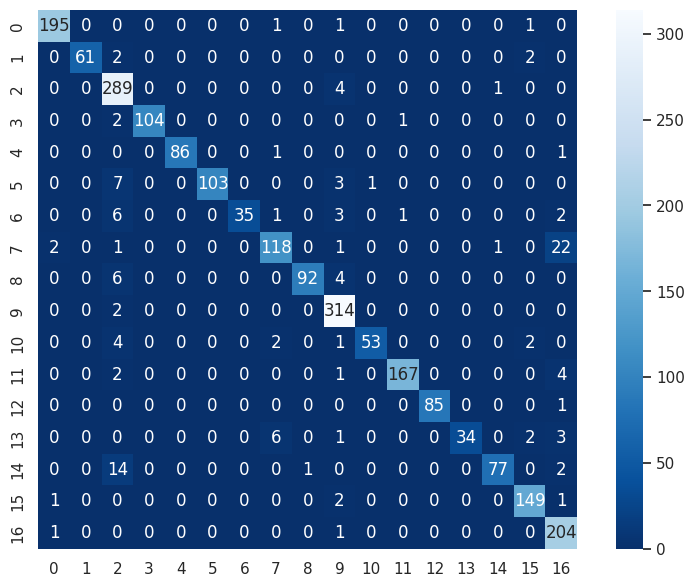

In [54]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for key,value in le_name_mapping.items():
    print(f"{value} : {key}")
cm = confusion_matrix(y_test,nb_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r')
per_class_accuracy = cm.diagonal()/cm.sum(axis=1)
print("per class accuracy:", per_class_accuracy)

## SVC

In [61]:
model = SVC()
model.fit(X_train,y_train)
svc_preds = model.predict(X_test)
print(classification_report(y_test, svc_preds))
print("Accuracy score: ", accuracy_score(y_test, svc_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       198
           1       1.00      0.98      0.99        65
           2       0.95      0.99      0.97       294
           3       1.00      0.99      1.00       107
           4       1.00      0.97      0.98        88
           5       0.99      0.95      0.97       114
           6       1.00      0.94      0.97        48
           7       0.95      0.97      0.96       145
           8       1.00      0.93      0.96       102
           9       0.95      1.00      0.97       316
          10       1.00      0.97      0.98        62
          11       1.00      0.98      0.99       174
          12       1.00      1.00      1.00        86
          13       1.00      0.87      0.93        46
          14       1.00      0.96      0.98        94
          15       0.99      0.99      0.99       153
          16       0.97      0.99      0.98       206

    accuracy              

0 : 3d_printed_clothes
1 : artificial_intelligence
2 : autonomous_transport
3 : biking
4 : capsule_wardrobe
5 : car_sharing
6 : cement_production
7 : clothes_designed_for_a_circular_economy
8 : drone
9 : e_health
10 : electric_car
11 : fiber_optic_cables
12 : organic_food
13 : rent_apparel
14 : shipping
15 : smart_food_management_kitchen_fridges_freezers
16 : sustainable_fabrics


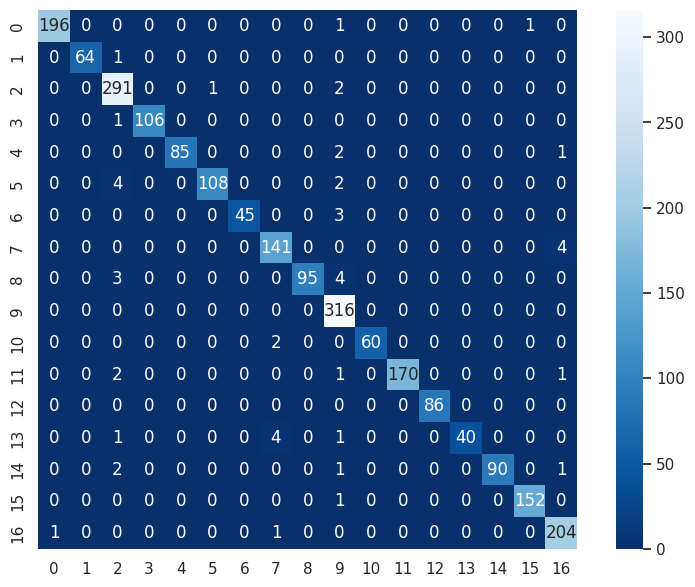

In [63]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for key,value in le_name_mapping.items():
    print(f"{value} : {key}")
cm = confusion_matrix(y_test,svc_preds)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="g", square = True, cmap = 'Blues_r');
per_class_accuracy = cm.diagonal()/cm.sum(axis=1)